In [ ]:
%pylab inline
%matplotlib inline
!pip install git+https://github.com/jakevdp/JSAnimation.git

Populating the interactive namespace from numpy and matplotlib
  Cloning https://github.com/jakevdp/JSAnimation.git to /tmp/pip-req-build-9ii7vaf3
  Running command git clone -q https://github.com/jakevdp/JSAnimation.git /tmp/pip-req-build-9ii7vaf3
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=12295 sha256=0577d1ba0bc46148b9eea98973fb4feda63eddbca083ede8d92fd55cb82e4ca0
  Stored in directory: /tmp/pip-ephem-wheel-cache-uy2g1b52/wheels/2e/69/c1/62e849a90a158df5c1d33ed530e381a74589f2be56d699c156
Successfully built JSAnimation


In [ ]:
# Perfect sensor
def sense(x):
    return x

In [ ]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [ ]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = 0
    uy = 0

    if t < 3:
        ux = 5
        uy = 0
        return array([ux, uy])
    if t < 4:
        ux = 0
        uy = 5.5
        return array([ux, uy])
    if t < 6:
        ux = -5
        uy = 0
        return array([ux, uy])
    if t < 7:
        ux = 0
        uy = 7
        return array([ux, uy])
    if t < 8:
        ux = 3
        uy = 0
        return array([ux, uy])
    if t < 9:
        ux = 0
        uy = -7
        return array([ux, uy])
    if t < 10:
        ux = 4
        uy = 0
        return array([ux, uy])
    if t < 11:
        ux = 0
        uy = 11.5
        return array([ux, uy])
    if t < 12:
        ux = 2
        uy = 0
        return array([ux, uy])
    
    return array([ux, uy])

In [ ]:
def collison(x):
  if x[0] >= 4 and x[0] <= 6 and x[1] >= -1 and x[1] <= 9:
    print("err 1: black middle-right")
  if x[0] >= .5 and x[0] <= 2.5 and x[1] >= 2 and x[1] <= 5:
    print("err 2: blue")
  if x[0] >= -6 and x[0] <= 9 and x[1] >= -5 and x[1] <= -4:
    print("err 3: long bottom")
  if x[0] >= 8 and x[0] <= 10 and x[1] >= 0 and x[1] <= 5:
    print("err 4: rightmost")
  if x[0] >= -4 and x[0] <= -2 and x[1] >= -3 and x[1] <= 5:
    print("err 5: leftmost")
  return

tf = 12.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([-5., -7.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    collison(x)
    x_log.append(copy(x))
  
print(x)
    
x_log = array(x_log)

[ 9. 10.]


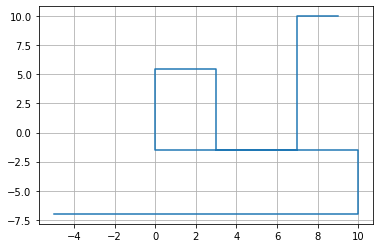

In [ ]:
grid()
plot(x_log[:,0], x_log[:,1])

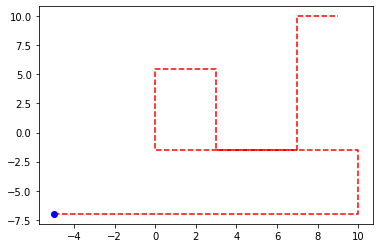

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())